In [1]:
# Config

from sentinelhub import SHConfig

config = SHConfig()
config.instance_id = "42886364-18e1-45e8-a4b0-c4a0c6600e89"
config.sh_client_id = "ac6ca0b7-a859-4801-8808-a6542a8ab077"
config.sh_client_secret = "}5[!??UG9W>d{Ud~Ao<7xW0]%DF!8l/SPr^#|WNi"
config.save()

if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret).")

# Imports

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from datetime import datetime, timedelta
import os

import matplotlib.pyplot as plt
import numpy as np

from sentinelhub import (
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

import json
import re
import shapely.wkt

from utils import plot_image


Image shape at 60 m resolution: (631, 1047) pixels
Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (1047, 631, 3)
Image type: uint8


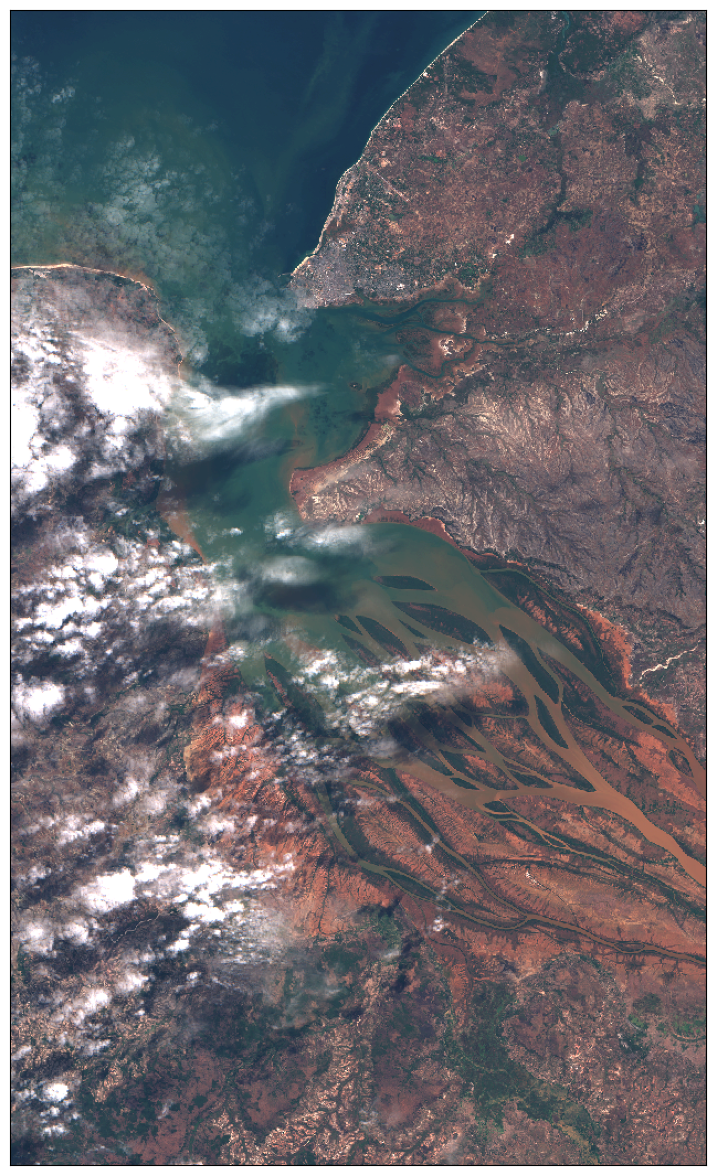

In [2]:
betsiboka_coords_wgs84 = (46.16, -16.15, 46.51, -15.58)
resolution = 60
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)
betsiboka_size = bbox_to_dimensions(betsiboka_bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: {betsiboka_size} pixels")

evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L1C,
            time_interval=("2020-06-12", "2020-06-13"),
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config,
)

true_color_imgs = request_true_color.get_data()

print(f"Returned data is of type = {type(true_color_imgs)} and length {len(true_color_imgs)}.")
print(f"Single element in the list is of type {type(true_color_imgs[-1])} and has shape {true_color_imgs[-1].shape}")

image = true_color_imgs[0]
print(f"Image type: {image.dtype}")

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness
plot_image(image, factor=3.5 / 255, clip_range=(0, 1))

In [3]:
import cv2
import numpy as np
image = cv2.imread('response.tiff')
image = np.asarray(image,dtype = np.float64)

ModuleNotFoundError: No module named 'cv2'